In [1]:
# from hmmlearn import hmm
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
# import pykovy-master/ 
from pykovy.src.pykovy import chain
import matplotlib.pyplot as plt

In [2]:

# np.random.seed(42)

# model = hmm.GaussianHMM(n_components=3, covariance_type="full")
# model.startprob_ = np.array([0.6, 0.3, 0.1])
# model.transmat_ = np.array([[0.7, 0.2, 0.1],
#                             [0.3, 0.5, 0.2],
#                             [0.3, 0.3, 0.4]])
# model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
# model.covars_ = np.tile(np.identity(2), (3, 1, 1))
# X, Z = model.sample(100)

In [3]:
df = pd.read_csv('../all_data.csv')
df = df[['Client Username', 'Association Time', 'Map Location', 'Session Duration']]

In [4]:
# re-code userid
df['Client Username'] = pd.Categorical(df['Client Username'])
df['Client Username'] = df['Client Username'].cat.codes
# df = df.drop(['Client Username'], axis=1)

# recode map location
map_dict = {}
count = 0
for i in df['Map Location'].unique():
    map_dict[i] = count
    count += 1
df['Map Location'] = df['Map Location'].map(map_dict)

In [5]:
df

,Client Username,Association Time,Map Location,Session Duration
0,55029,Mon Jul 02 12:43:23 PDT 2018,0,3 hrs 31 min 53 sec
1,46470,Mon Jul 02 13:25:13 PDT 2018,1,2 hrs 36 min 28 sec
2,46470,Mon Jul 02 16:01:41 PDT 2018,1,10 min 11 sec
3,46470,Mon Jul 02 16:17:43 PDT 2018,1,49 sec
4,62338,Mon Jul 02 11:15:04 PDT 2018,2,5 min 9 sec
5,62338,Mon Jul 02 11:25:19 PDT 2018,2,5 min 5 sec
6,62338,Mon Jul 02 11:30:26 PDT 2018,3,5 min 6 sec
7,62338,Mon Jul 02 11:35:33 PDT 2018,4,5 min 7 sec
8,62338,Mon Jul 02 13:14:58 PDT 2018,5,5 min 10 sec
9,62338,Mon Jul 02 13:20:09 PDT 2018,6,5 min 3 sec


In [6]:
df1 = df.loc[df['Client Username'] == 3102]
df1.loc[df1['Map Location'] == 100]

,Client Username,Association Time,Map Location,Session Duration
63542,3102,Mon Jul 02 09:24:37 PDT 2018,100,5 min 7 sec
63543,3102,Mon Jul 02 09:29:45 PDT 2018,100,5 min 5 sec
446052,3102,Mon Jun 18 16:37:12 PDT 2018,100,5 min 3 sec
446053,3102,Tue Jun 19 08:43:17 PDT 2018,100,4 min 59 sec
471058,3102,Fri Jun 15 16:27:59 PDT 2018,100,10 min 10 sec
655214,3102,Fri Jun 29 17:54:48 PDT 2018,100,5 min 10 sec
1083748,3102,Tue May 22 17:12:55 PDT 2018,100,5 min 32 sec
1083749,3102,Tue May 22 17:18:28 PDT 2018,100,5 min 23 sec
1510196,3102,Fri Jun 22 08:51:36 PDT 2018,100,5 min 6 sec
1700794,3102,Wed Jun 27 09:39:45 PDT 2018,100,16 min 15 sec


In [7]:
def convertMonth(month):
    if month == 'Jan': return 1
    elif month == 'Feb': return 2
    elif month == 'Mar': return 3
    elif month == 'Apr': return 4
    elif month == 'May': return 5
    elif month == 'Jun': return 6
    elif month == 'Jul': return 7
    elif month == 'Aug': return 8
    elif month == 'Sep': return 9
    elif month == 'Oct': return 10
    elif month == 'Nov': return 11
    elif month == 'Dec': return 12
    else: print('error input is not correct')
        
def convert_to_timeslot(duration):
    temp = duration.split()
    if len(temp) == 2: sess_duration = int(temp[0])
    elif len(temp) == 4: sess_duration = int(temp[0]) * 60 + int(temp[2])
    elif len(temp) == 6: sess_duration = (int(temp[0]) * 60 + int(temp[2])) * 60 + int(temp[4])
    else: print('error')
    return datetime.timedelta(seconds=sess_duration)

def convert_to_datetime(time):
    temp = time.split()
    d_time = datetime.datetime(year=int(temp[5]), month=convertMonth(temp[1]), day=int(temp[2]), hour=int(temp[3].split(':')[0]), minute=int(temp[3].split(':')[1]), second=int(temp[3].split(':')[2]))
    return d_time


In [8]:
# data_list has same number of row as df.
# Each row [userid, map_loc, associate_time, associate_time+sess_dur, sess_dur].
data_list = []
c=0
for i in range(df.shape[0]):
    if c%500000 == 0:
        print(c)
    sess = convert_to_timeslot(df.iloc[i,3])
    s_time = convert_to_datetime(df.iloc[i,1])
    e_time = s_time + sess
    data_list.append([df.iloc[i,0], df.iloc[i,2], s_time, e_time, sess])
    c+=1


0
500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000


In [9]:
data_list = sorted(data_list, key=lambda element: (element[0], element[2]))


In [10]:
# for i in data_list:
#     if i[0] == 3102:
#         print(i)

In [11]:
# add up the session duration when the previous row has the same userid and location. 
# (this happen when you disconnect from the ap and reconnect again or your wifi session expire, etc.)
c = 0
for i in reversed(range(1, df.shape[0])):
    if c%500000 == 0: print(c)
    if data_list[i][0] == data_list[i-1][0] and data_list[i][1] == data_list[i-1][1]: #and data_list[i][2] - data_list[i-1][3] <= timedelta(hours=5):
        data_list[i-1][4] += data_list[i][4]
    c+=1

0
500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000


In [12]:
# loop each row, remove the next concecutive rows has the same userid and map_loc with the current row.
# Because they are useless now
final_data_list = []
i = 0
while i < df.shape[0]-1:
    if data_list[i][0] == data_list[i+1][0] and data_list[i][1] == data_list[i+1][1]:
        final_data_list.append(data_list[i])
        c = 2
        while i+c <= df.shape[0]-1 and data_list[i][0] == data_list[i+c][0] and data_list[i][1] == data_list[i+c][1]:
            c += 1
        i += c

    else:
        final_data_list.append(data_list[i])
        i += 1

if not (final_data_list[-1][0] == data_list[-1][0] and final_data_list[-1][1] == data_list[-1][1]):
    final_data_list.append(data_list[-1])


In [13]:
print(len(final_data_list))
print(len(data_list))
# for i in range(len(final_data_list)):
#     if final_data_list[i][0] == 3102:
#         print(final_data_list[i])

#     break

2380449
6114987


In [14]:
# user_dict's key are each userid and value is a list of all rows of each user in final_data_list
user_dict = defaultdict(list)
for row in final_data_list:
    user_dict[row[0]].append([row[2], row[1], row[4]])


In [15]:
for usr in user_dict:
    user_dict[usr].sort()


In [16]:
for usr in user_dict:
    print(user_dict[usr])
    break

[[datetime.datetime(2018, 5, 12, 11, 39, 42), 80, datetime.timedelta(seconds=23384)], [datetime.datetime(2018, 5, 13, 13, 10, 46), 55, datetime.timedelta(seconds=303)], [datetime.datetime(2018, 5, 13, 13, 15, 51), 0, datetime.timedelta(seconds=20827)], [datetime.datetime(2018, 5, 19, 9, 31, 8), 69, datetime.timedelta(seconds=302)], [datetime.datetime(2018, 5, 19, 12, 2, 29), 5, datetime.timedelta(seconds=320)], [datetime.datetime(2018, 5, 22, 16, 35, 9), 34, datetime.timedelta(seconds=1604)], [datetime.datetime(2018, 5, 22, 18, 23), 19, datetime.timedelta(seconds=1872)]]


In [17]:
# make an 198x198 graph (198 is the number of aps) this is the graph of the school, 
# the edges are how many connections in total that all students have traveled.
num_aps = len(df["Map Location"].unique())
undir_map = np.zeros(39204, dtype=np.int32).reshape(198, 198)
for usr in user_dict:
    for i in range(len(user_dict[usr])-1):
        if user_dict[usr][i][1] != user_dict[usr][i+1][1]:
            undir_map[user_dict[usr][i][1]][user_dict[usr][i+1][1]] += 1
            undir_map[user_dict[usr][i+1][1]][user_dict[usr][i][1]] += 1


In [18]:
for i in range(len(undir_map)):
    print(undir_map[i])


[   0  350 3055  632  216 1901   79  607 1039 1701   11  226   12   33
    5    6 2246    5   34  686  241   62 1072   30  309  243   21    3
   12   12   39   63    0    0  235 1961   29    1  114   29   22  130
   56   51   23   33   20   13   82   96    0   20   43   25  219 2986
 2283    8 1235   52   14    9   12   37    5   89    4    7    3   49
    4   35   17   17   45   86    0   36   35   57 1024   34  155   17
   42   14    7   15   55   56   36   19   15   16   25   10    6   55
   51    1   13    5   21    6   10   41   28    4    0    2  302   12
   10    2    1   36   12   11    3   36    7  123   12   21   16   13
   28    9    3    7    7   13   58    2    8    8   48   23    1   21
   26    4    0    5    9    7    0    1   10    1    9   25    9    5
    0   17    7   16    0    0   24   38   50  123   76    4    6    5
    4    2   34    0   13   31   80  192    2   18    4    3    0    3
   21    6    8   13    5    4    6   19   34    1    0    1    0    2
    1 

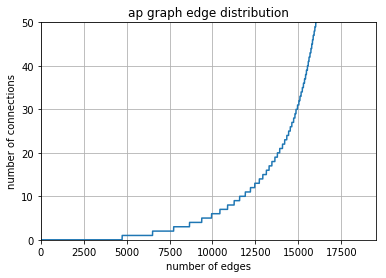

In [75]:
# draw the number of connections each edge is used. Change ax.set_ylim([0, 75]) to scale the graph
# try to find the edges that are bad (low connections, too high connections) and prune them

# tt = np.arange(0,16, dtype=np.int16).reshape(4,4)
# for i in range(len(tt)):
#     for j in range(len(tt[i])):
#         if i == j: tt[i][j] = 0
# for i in tt:
#     print(i)
draw_list = []
c = 0
for i in range(len(undir_map)):
    c+=1
    for j in range(len(undir_map[i])-c):
        draw_list.append(undir_map[i][j+c])
draw_list.sort()
# Data for plotting
x = np.arange(0,len(draw_list))

_, ax = plt.subplots()
ax.set_xlim([0, len(draw_list)])
ax.set_ylim([0, 50])
ax.plot(x, draw_list)
ax.set(xlabel='number of edges', ylabel='number of connections',
       title='ap graph edge distribution')
ax.grid()
# fig.savefig("test.png")
plt.show()

In [20]:
# # create a time slot 2d array each row is a user and each cols is a timeslot.
# # for a particular user if there is no information on a particular time slot append(-1)
# # this function is not finished
# def create_time_slot_data(user_dict, global_start_st, global_end_st, window_in_minutes):
#     window_in_sec = window_in_minutes * 60
#     time_slot_dict = defaultdict(list)
#     time_slot_start_st = int(global_start_st.minute/window_in_minutes)

#     for usr in user_dict:
#         curr_time_slot = time_slot_start_st
#         prev_st = 0
#         for i in range(len(user_dict[usr])):    
#             e_time = user_dict[usr][i][0] + user_dict[usr][i][2]
#             if i != 0:
#                 if (e_time - prev_st).second in range(0,window_in_sec):
                    
#                 else:

#             else:
#                 while True:
#                     if user_dict[usr][i][0] <= curr_time_slot:
#                         loop_times = int((curr_time_slot - e_time).second/300) + 1
#                         for _ in range(loop_times):
#                             time_slot_dict[usr].append(user_dict[usr][i][1])
#                         break
#                     else:
#                         time_slot_dict[usr].append(-1)
#                     curr_time_slot += datetime.timedelta(seconds=window_in_sec)
#         break

In [21]:
# temp = sorted(data_list, key=lambda element: (element[2]))
# global_start_st = temp[0][2]
# global_end_st = temp[-1][2]



In [22]:
# # create a time slot 2d array each row is a user and each cols is a timeslot.
# # for a particular user if there is no information on a particular time slot append(-1)
# # this function is not finished
# def create_time_slot_data(user_dict, global_start_st, global_end_st, window_in_minutes):
#     window_in_sec = window_in_minutes * 60
#     time_slot_dict = defaultdict(list)
#     temp = int(global_start_st.minute/window_in_minutes)*5
#     time_slot_start_st = global_start_st - datetime.timedelta(minutes= global_start_st.minute,seconds=global_start_st.second) + datetime.timedelta(minutes=temp)
#     c=0
#     for usr in user_dict:
#         if c==2: return time_slot_dict
#         c+=1
#         curr_time_slot = time_slot_start_st
#         for i in range(len(user_dict[usr])):

#             e_time = user_dict[usr][i][0] + user_dict[usr][i][2]
#             print(e_time)
            
#             while True:
#                 if user_dict[usr][i][0] <= curr_time_slot:
#                     loop_times = int((e_time-curr_time_slot).seconds/window_in_sec) + 1
# #                     print(44, e_time-curr_time_slot)
# #                     print(loop_times)
#                     for _ in range(loop_times):
#                         time_slot_dict[usr].append(user_dict[usr][i][1])
                    
#                     if i < len(user_dict[usr])-1:
#                         loop_times = int((user_dict[usr][i+1][0] - e_time).seconds/window_in_sec) + 1
#                         print(loop_times)
#                         for _ in range(loop_times):
#                             time_slot_dict[usr].append(-1)

#                         curr_time_slot = user_dict[usr][i+1][0]
#                     break
#                 else:
                    
#                     time_slot_dict[usr].append(-1)
#                 curr_time_slot += datetime.timedelta(seconds=window_in_sec)
            
#     return time_slot_dict

In [23]:
# #datetime.datetime(2018, 5, 12, 11, 39, 42), 80, datetime.timedelta(seconds=23384)]
# # [datetime.datetime(2018, 5, 13, 13, 10, 46), 55, datetime.timedelta(seconds=303)]

# time_slot_dict = create_time_slot_data(user_dict, global_start_st, global_end_st, 5)
# global_start_st

In [63]:
# time spend on each ap during the entire dataset for each user
ap_freq_dict = defaultdict(dict)
total_time_each_usr = {}
for usr in user_dict:
    for i in range(len(user_dict[usr])): 
        ap_freq_dict[usr][user_dict[usr][i][1]] = datetime.timedelta(0)
        total_time_each_usr[usr] = datetime.timedelta(0)

for usr in user_dict:
    for i in range(len(user_dict[usr])):
        ap_freq_dict[usr][user_dict[usr][i][1]] += user_dict[usr][i][2]
        total_time_each_usr[usr] += user_dict[usr][i][2]

In [70]:
# for usr in user_dict:
#     print(usr, len(user_dict[usr]))
ap_freq_dict[1]

{8: datetime.timedelta(days=1, seconds=4438),
 22: datetime.timedelta(seconds=1514),
 31: datetime.timedelta(seconds=2154),
 0: datetime.timedelta(seconds=10551),
 9: datetime.timedelta(seconds=306),
 7: datetime.timedelta(seconds=301),
 55: datetime.timedelta(seconds=305)}

In [79]:
#networkx this is for drawing the graph ignore now
import networkx as nx

undir_map1 = np.zeros(len(undir_map)**2, dtype=np.int32).reshape(198, 198)

for i in range(len(undir_map)):
    for j in range(len(undir_map[i])):
        if undir_map[i][j] >=10 and undir_map[i][j] <=5000:
            undir_map1[i][j] = 1
        else: undir_map1[i][j] = 0


In [132]:
nx_graph = nx.to_networkx_graph(undir_map1)

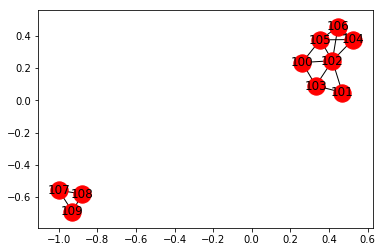

In [152]:
res = np.arange(100, 110)
# nx.draw_networkx(nx_graph, nodelist=res, node_size=[6])
# pos = nx.spring_layout(nx_graph)  #setting the positions with respect to G, not k.
k = nx_graph.subgraph(res)

nx.draw_networkx(k)

In [86]:
for i in range(len(undir_map)):
    print(undir_map1[i])

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0]
[1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0]
[1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0

In [101]:
# find all the paths from 2 nodes with length of 3 or less
paths = nx.algorithms.simple_paths.all_simple_paths(nx_graph, 3, 5, cutoff= 3)

In [102]:
c=0
for path in paths:
    c += 1
    print(path)
print(c)

[3, 0, 2, 5]
[3, 0, 5]
[3, 0, 6, 5]
[3, 0, 7, 5]
[3, 0, 9, 5]
[3, 0, 10, 5]
[3, 0, 12, 5]
[3, 0, 13, 5]
[3, 0, 16, 5]
[3, 0, 18, 5]
[3, 0, 21, 5]
[3, 0, 22, 5]
[3, 0, 23, 5]
[3, 0, 24, 5]
[3, 0, 26, 5]
[3, 0, 28, 5]
[3, 0, 30, 5]
[3, 0, 31, 5]
[3, 0, 35, 5]
[3, 0, 36, 5]
[3, 0, 38, 5]
[3, 0, 39, 5]
[3, 0, 40, 5]
[3, 0, 41, 5]
[3, 0, 44, 5]
[3, 0, 45, 5]
[3, 0, 46, 5]
[3, 0, 47, 5]
[3, 0, 51, 5]
[3, 0, 52, 5]
[3, 0, 53, 5]
[3, 0, 56, 5]
[3, 0, 58, 5]
[3, 0, 59, 5]
[3, 0, 60, 5]
[3, 0, 62, 5]
[3, 0, 69, 5]
[3, 0, 71, 5]
[3, 0, 72, 5]
[3, 0, 73, 5]
[3, 0, 74, 5]
[3, 0, 75, 5]
[3, 0, 77, 5]
[3, 0, 78, 5]
[3, 0, 79, 5]
[3, 0, 80, 5]
[3, 0, 81, 5]
[3, 0, 83, 5]
[3, 0, 84, 5]
[3, 0, 85, 5]
[3, 0, 87, 5]
[3, 0, 89, 5]
[3, 0, 90, 5]
[3, 0, 91, 5]
[3, 0, 92, 5]
[3, 0, 93, 5]
[3, 0, 94, 5]
[3, 0, 95, 5]
[3, 0, 100, 5]
[3, 0, 102, 5]
[3, 0, 104, 5]
[3, 0, 105, 5]
[3, 0, 106, 5]
[3, 0, 110, 5]
[3, 0, 111, 5]
[3, 0, 112, 5]
[3, 0, 115, 5]
[3, 0, 116, 5]
[3, 0, 117, 5]
[3, 0, 119, 5]
[3, 0, 121, 5]
[

[3, 23, 150, 5]
[3, 23, 153, 5]
[3, 23, 155, 5]
[3, 23, 166, 5]
[3, 23, 168, 5]
[3, 23, 172, 5]
[3, 23, 175, 5]
[3, 25, 0, 5]
[3, 25, 2, 5]
[3, 25, 6, 5]
[3, 25, 7, 5]
[3, 25, 9, 5]
[3, 25, 13, 5]
[3, 25, 15, 5]
[3, 25, 16, 5]
[3, 25, 17, 5]
[3, 25, 18, 5]
[3, 25, 21, 5]
[3, 25, 22, 5]
[3, 25, 23, 5]
[3, 25, 26, 5]
[3, 25, 28, 5]
[3, 25, 30, 5]
[3, 25, 31, 5]
[3, 25, 35, 5]
[3, 25, 36, 5]
[3, 25, 37, 5]
[3, 25, 38, 5]
[3, 25, 39, 5]
[3, 25, 40, 5]
[3, 25, 41, 5]
[3, 25, 44, 5]
[3, 25, 45, 5]
[3, 25, 46, 5]
[3, 25, 47, 5]
[3, 25, 50, 5]
[3, 25, 51, 5]
[3, 25, 52, 5]
[3, 25, 53, 5]
[3, 25, 56, 5]
[3, 25, 57, 5]
[3, 25, 58, 5]
[3, 25, 59, 5]
[3, 25, 60, 5]
[3, 25, 61, 5]
[3, 25, 62, 5]
[3, 25, 67, 5]
[3, 25, 68, 5]
[3, 25, 69, 5]
[3, 25, 70, 5]
[3, 25, 71, 5]
[3, 25, 72, 5]
[3, 25, 73, 5]
[3, 25, 74, 5]
[3, 25, 75, 5]
[3, 25, 77, 5]
[3, 25, 78, 5]
[3, 25, 79, 5]
[3, 25, 80, 5]
[3, 25, 81, 5]
[3, 25, 83, 5]
[3, 25, 84, 5]
[3, 25, 85, 5]
[3, 25, 86, 5]
[3, 25, 87, 5]
[3, 25, 89, 5]
[3, 25, 

[3, 44, 118, 5]
[3, 44, 119, 5]
[3, 44, 121, 5]
[3, 44, 122, 5]
[3, 44, 123, 5]
[3, 44, 125, 5]
[3, 44, 126, 5]
[3, 44, 127, 5]
[3, 44, 128, 5]
[3, 44, 129, 5]
[3, 44, 135, 5]
[3, 44, 136, 5]
[3, 44, 137, 5]
[3, 44, 139, 5]
[3, 44, 140, 5]
[3, 44, 141, 5]
[3, 44, 144, 5]
[3, 44, 148, 5]
[3, 44, 150, 5]
[3, 44, 151, 5]
[3, 44, 152, 5]
[3, 44, 153, 5]
[3, 44, 157, 5]
[3, 44, 161, 5]
[3, 44, 162, 5]
[3, 44, 163, 5]
[3, 44, 166, 5]
[3, 44, 167, 5]
[3, 44, 168, 5]
[3, 44, 173, 5]
[3, 44, 174, 5]
[3, 44, 175, 5]
[3, 44, 190, 5]
[3, 44, 191, 5]
[3, 44, 195, 5]
[3, 45, 0, 5]
[3, 45, 2, 5]
[3, 45, 5]
[3, 45, 6, 5]
[3, 45, 7, 5]
[3, 45, 9, 5]
[3, 45, 13, 5]
[3, 45, 16, 5]
[3, 45, 18, 5]
[3, 45, 21, 5]
[3, 45, 22, 5]
[3, 45, 27, 5]
[3, 45, 28, 5]
[3, 45, 30, 5]
[3, 45, 31, 5]
[3, 45, 35, 5]
[3, 45, 36, 5]
[3, 45, 38, 5]
[3, 45, 39, 5]
[3, 45, 41, 5]
[3, 45, 44, 5]
[3, 45, 46, 5]
[3, 45, 52, 5]
[3, 45, 56, 5]
[3, 45, 59, 5]
[3, 45, 60, 5]
[3, 45, 67, 5]
[3, 45, 68, 5]
[3, 45, 69, 5]
[3, 45, 71, 5]

[3, 62, 163, 5]
[3, 62, 164, 5]
[3, 62, 166, 5]
[3, 62, 170, 5]
[3, 62, 173, 5]
[3, 62, 174, 5]
[3, 62, 175, 5]
[3, 62, 179, 5]
[3, 62, 181, 5]
[3, 62, 182, 5]
[3, 62, 183, 5]
[3, 62, 184, 5]
[3, 62, 185, 5]
[3, 62, 186, 5]
[3, 62, 187, 5]
[3, 62, 190, 5]
[3, 63, 0, 5]
[3, 63, 2, 5]
[3, 63, 6, 5]
[3, 63, 7, 5]
[3, 63, 9, 5]
[3, 63, 13, 5]
[3, 63, 14, 5]
[3, 63, 15, 5]
[3, 63, 16, 5]
[3, 63, 17, 5]
[3, 63, 21, 5]
[3, 63, 22, 5]
[3, 63, 23, 5]
[3, 63, 24, 5]
[3, 63, 26, 5]
[3, 63, 27, 5]
[3, 63, 28, 5]
[3, 63, 30, 5]
[3, 63, 31, 5]
[3, 63, 35, 5]
[3, 63, 36, 5]
[3, 63, 37, 5]
[3, 63, 38, 5]
[3, 63, 39, 5]
[3, 63, 41, 5]
[3, 63, 44, 5]
[3, 63, 45, 5]
[3, 63, 46, 5]
[3, 63, 47, 5]
[3, 63, 50, 5]
[3, 63, 51, 5]
[3, 63, 52, 5]
[3, 63, 53, 5]
[3, 63, 56, 5]
[3, 63, 58, 5]
[3, 63, 59, 5]
[3, 63, 61, 5]
[3, 63, 62, 5]
[3, 63, 64, 5]
[3, 63, 67, 5]
[3, 63, 69, 5]
[3, 63, 70, 5]
[3, 63, 71, 5]
[3, 63, 72, 5]
[3, 63, 73, 5]
[3, 63, 74, 5]
[3, 63, 75, 5]
[3, 63, 77, 5]
[3, 63, 78, 5]
[3, 63, 79, 5]

[3, 75, 85, 5]
[3, 75, 86, 5]
[3, 75, 87, 5]
[3, 75, 89, 5]
[3, 75, 90, 5]
[3, 75, 91, 5]
[3, 75, 94, 5]
[3, 75, 99, 5]
[3, 75, 102, 5]
[3, 75, 105, 5]
[3, 75, 106, 5]
[3, 75, 110, 5]
[3, 75, 111, 5]
[3, 75, 112, 5]
[3, 75, 113, 5]
[3, 75, 114, 5]
[3, 75, 115, 5]
[3, 75, 116, 5]
[3, 75, 117, 5]
[3, 75, 119, 5]
[3, 75, 121, 5]
[3, 75, 126, 5]
[3, 75, 127, 5]
[3, 75, 128, 5]
[3, 75, 129, 5]
[3, 75, 132, 5]
[3, 75, 136, 5]
[3, 75, 137, 5]
[3, 75, 139, 5]
[3, 75, 140, 5]
[3, 75, 141, 5]
[3, 75, 144, 5]
[3, 75, 150, 5]
[3, 75, 151, 5]
[3, 75, 155, 5]
[3, 75, 166, 5]
[3, 75, 168, 5]
[3, 75, 173, 5]
[3, 75, 174, 5]
[3, 75, 175, 5]
[3, 75, 191, 5]
[3, 75, 192, 5]
[3, 75, 194, 5]
[3, 75, 195, 5]
[3, 77, 0, 5]
[3, 77, 2, 5]
[3, 77, 5]
[3, 77, 6, 5]
[3, 77, 7, 5]
[3, 77, 9, 5]
[3, 77, 13, 5]
[3, 77, 16, 5]
[3, 77, 21, 5]
[3, 77, 22, 5]
[3, 77, 23, 5]
[3, 77, 30, 5]
[3, 77, 31, 5]
[3, 77, 35, 5]
[3, 77, 38, 5]
[3, 77, 41, 5]
[3, 77, 44, 5]
[3, 77, 45, 5]
[3, 77, 46, 5]
[3, 77, 47, 5]
[3, 77, 56, 5

[3, 98, 101, 5]
[3, 98, 102, 5]
[3, 98, 103, 5]
[3, 98, 104, 5]
[3, 98, 110, 5]
[3, 98, 111, 5]
[3, 98, 112, 5]
[3, 98, 113, 5]
[3, 98, 115, 5]
[3, 98, 117, 5]
[3, 98, 118, 5]
[3, 98, 121, 5]
[3, 98, 122, 5]
[3, 98, 123, 5]
[3, 98, 124, 5]
[3, 98, 125, 5]
[3, 98, 126, 5]
[3, 98, 127, 5]
[3, 98, 128, 5]
[3, 98, 129, 5]
[3, 98, 130, 5]
[3, 98, 131, 5]
[3, 98, 133, 5]
[3, 98, 134, 5]
[3, 98, 135, 5]
[3, 98, 136, 5]
[3, 98, 137, 5]
[3, 98, 138, 5]
[3, 98, 140, 5]
[3, 98, 141, 5]
[3, 98, 143, 5]
[3, 98, 145, 5]
[3, 98, 146, 5]
[3, 98, 147, 5]
[3, 98, 150, 5]
[3, 98, 151, 5]
[3, 98, 152, 5]
[3, 98, 153, 5]
[3, 98, 154, 5]
[3, 98, 155, 5]
[3, 98, 156, 5]
[3, 98, 157, 5]
[3, 98, 160, 5]
[3, 98, 161, 5]
[3, 98, 162, 5]
[3, 98, 163, 5]
[3, 98, 164, 5]
[3, 98, 165, 5]
[3, 98, 166, 5]
[3, 98, 167, 5]
[3, 98, 168, 5]
[3, 98, 170, 5]
[3, 98, 173, 5]
[3, 98, 174, 5]
[3, 98, 175, 5]
[3, 98, 179, 5]
[3, 98, 181, 5]
[3, 98, 182, 5]
[3, 98, 183, 5]
[3, 98, 184, 5]
[3, 98, 185, 5]
[3, 98, 186, 5]
[3, 98, 

[3, 128, 175, 5]
[3, 129, 2, 5]
[3, 129, 5]
[3, 129, 6, 5]
[3, 129, 7, 5]
[3, 129, 9, 5]
[3, 129, 13, 5]
[3, 129, 15, 5]
[3, 129, 18, 5]
[3, 129, 21, 5]
[3, 129, 22, 5]
[3, 129, 31, 5]
[3, 129, 35, 5]
[3, 129, 36, 5]
[3, 129, 38, 5]
[3, 129, 39, 5]
[3, 129, 44, 5]
[3, 129, 45, 5]
[3, 129, 46, 5]
[3, 129, 51, 5]
[3, 129, 52, 5]
[3, 129, 53, 5]
[3, 129, 56, 5]
[3, 129, 59, 5]
[3, 129, 68, 5]
[3, 129, 69, 5]
[3, 129, 71, 5]
[3, 129, 72, 5]
[3, 129, 74, 5]
[3, 129, 75, 5]
[3, 129, 77, 5]
[3, 129, 84, 5]
[3, 129, 87, 5]
[3, 129, 90, 5]
[3, 129, 91, 5]
[3, 129, 92, 5]
[3, 129, 93, 5]
[3, 129, 101, 5]
[3, 129, 102, 5]
[3, 129, 105, 5]
[3, 129, 106, 5]
[3, 129, 111, 5]
[3, 129, 112, 5]
[3, 129, 115, 5]
[3, 129, 117, 5]
[3, 129, 119, 5]
[3, 129, 126, 5]
[3, 129, 127, 5]
[3, 129, 128, 5]
[3, 129, 137, 5]
[3, 129, 140, 5]
[3, 129, 151, 5]
[3, 129, 168, 5]
[3, 129, 173, 5]
[3, 129, 174, 5]
[3, 129, 175, 5]
[3, 129, 182, 5]
[3, 130, 5]
[3, 130, 9, 5]
[3, 130, 13, 5]
[3, 130, 26, 5]
[3, 130, 27, 5]


[3, 166, 126, 5]
[3, 166, 127, 5]
[3, 166, 128, 5]
[3, 166, 130, 5]
[3, 166, 131, 5]
[3, 166, 133, 5]
[3, 166, 134, 5]
[3, 166, 137, 5]
[3, 166, 140, 5]
[3, 166, 141, 5]
[3, 166, 150, 5]
[3, 166, 151, 5]
[3, 166, 153, 5]
[3, 166, 154, 5]
[3, 166, 155, 5]
[3, 166, 156, 5]
[3, 166, 157, 5]
[3, 166, 163, 5]
[3, 166, 164, 5]
[3, 166, 165, 5]
[3, 166, 167, 5]
[3, 166, 168, 5]
[3, 166, 170, 5]
[3, 166, 173, 5]
[3, 166, 174, 5]
[3, 166, 175, 5]
[3, 166, 182, 5]
[3, 166, 183, 5]
[3, 166, 184, 5]
[3, 166, 186, 5]
[3, 166, 187, 5]
[3, 166, 190, 5]
[3, 167, 5]
[3, 167, 26, 5]
[3, 167, 35, 5]
[3, 167, 36, 5]
[3, 167, 44, 5]
[3, 167, 50, 5]
[3, 167, 51, 5]
[3, 167, 52, 5]
[3, 167, 53, 5]
[3, 167, 61, 5]
[3, 167, 64, 5]
[3, 167, 67, 5]
[3, 167, 71, 5]
[3, 167, 72, 5]
[3, 167, 87, 5]
[3, 167, 93, 5]
[3, 167, 94, 5]
[3, 167, 101, 5]
[3, 167, 111, 5]
[3, 167, 119, 5]
[3, 167, 122, 5]
[3, 167, 131, 5]
[3, 167, 134, 5]
[3, 167, 137, 5]
[3, 167, 140, 5]
[3, 167, 151, 5]
[3, 167, 153, 5]
[3, 167, 154, 5]
[

In [ ]:
# for usr in user_dict:
#     for i in range(len(user_dict[usr])):

In [112]:
for usr in user_dict:
    for i in range(len(user_dict[usr])):
        print(user_dict[usr][i])
    break

[datetime.datetime(2018, 5, 12, 11, 39, 42), 80, datetime.timedelta(seconds=23384)]
[datetime.datetime(2018, 5, 13, 13, 10, 46), 55, datetime.timedelta(seconds=303)]
[datetime.datetime(2018, 5, 13, 13, 15, 51), 0, datetime.timedelta(seconds=20827)]
[datetime.datetime(2018, 5, 19, 9, 31, 8), 69, datetime.timedelta(seconds=302)]
[datetime.datetime(2018, 5, 19, 12, 2, 29), 5, datetime.timedelta(seconds=320)]
[datetime.datetime(2018, 5, 22, 16, 35, 9), 34, datetime.timedelta(seconds=1604)]
[datetime.datetime(2018, 5, 22, 18, 23), 19, datetime.timedelta(seconds=1872)]


In [84]:
# trans_data = []

# max_time = datetime.datetime(year=2018, month=7, day=3, hour=0, minute=0, second=0)
# min_time = datetime.datetime(year=2018, month=6, day=24, hour=0, minute=0, second=0)
# t_win = datetime.timedelta(hours = 1)
# ap_num = len(df['Map Location'].unique())
# hash_hash = {}
# while min_time < max_time:
#     trans_data.append(min_time)
#     min_time += t_win
    
# for i in trans_data:
#     hash_hash[i] = defaultdict(int)

# c = 0
# for i in trans_data:
#     print(c)
#     c+=1
#     for j in df['Map Location'].unique():
#         hash_hash[i][j] = defaultdict(int)



In [153]:
# df[df['Client Username']==10020]

In [123]:
# this part is for timer ignore
from time import time

def timer(func):
    def wrapper(x,y,z):
        before = time()
        rv = func(x,y,z)
        after = time()
        print('Elapsed: ', after-before)
        return rv
    return wrapper

@timer
def test_func(x,y,z):
    return x+y+z

test_func(1,2,3)

Elapsed:  9.5367431640625e-07


6